# Blueprints for Web-scraping using Python
### Project: Webscraping Yahoo Stock Data
### Author: Akbar Azad
### Date: 19 May 2021

### Description: Extract, process, analyse and visualise Amarin (Ticker Symbol: AMRN) stock over a period of time
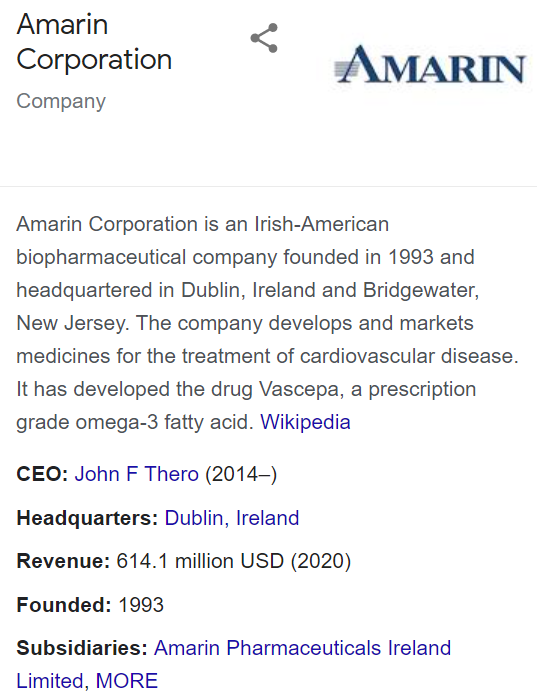
Image from Google

##### PART 1: BEGINNER
###### Pre-requisites: 
###### 1. Anaconda installed on desktop
###### 2. No programming experience needed
###### 3. Create an account on https://rapidapi.com/

In [55]:
# Import packages
import pandas as pd # For data wrangling
import requests # For making API calls
import datetime # For date-related functions
import json # For converting data into JSON format
# Import Python script (.py file)
import rapidapi_stock_historical_data_secret as secret # For usage of key

In [44]:
# Preparing to make API calls

# Define URL
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v3/get-historical-data"

# Define query and its parameters (symbol, region)
query = {"symbol":"AMRN","region":"US"}

# Define headers (a dictionary) and its key-value pairs
headers = {
    'x-rapidapi-key': secret.key,
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

# Make API call to access stock data
response = requests.request("GET", url, headers= headers, params= query)

# Store scraped stock data
data = response.text

# Show data
print(data)

{"prices":[{"date":1621439059,"open":4.455999851226807,"high":4.565000057220459,"low":4.400000095367432,"close":4.510000228881836,"volume":1028594,"adjclose":4.510000228881836},{"date":1621344600,"open":4.369999885559082,"high":4.630000114440918,"low":4.340000152587891,"close":4.539999961853027,"volume":3765800,"adjclose":4.539999961853027},{"date":1621258200,"open":4.349999904632568,"high":4.380000114440918,"low":4.25,"close":4.320000171661377,"volume":3376000,"adjclose":4.320000171661377},{"date":1620999000,"open":4.260000228881836,"high":4.449999809265137,"low":4.21999979019165,"close":4.380000114440918,"volume":5193200,"adjclose":4.380000114440918},{"date":1620912600,"open":4.360000133514404,"high":4.480000019073486,"low":4.159999847412109,"close":4.260000228881836,"volume":4579700,"adjclose":4.260000228881836},{"date":1620826200,"open":4.400000095367432,"high":4.46999979019165,"low":4.28000020980835,"close":4.349999904632568,"volume":7632200,"adjclose":4.349999904632568},{"date":1

Data type:  <class 'dict'>
Length:  6
Dictionay keys:  dict_keys(['prices', 'isPending', 'firstTradeDate', 'id', 'timeZone', 'eventsData'])
Data type for prices:  <class 'list'>
Length of prices data:  253
First element of prices data:  {'date': 1621439059, 'open': 4.455999851226807, 'high': 4.565000057220459, 'low': 4.400000095367432, 'close': 4.510000228881836, 'volume': 1028594, 'adjclose': 4.510000228881836}
Data type for elements of prices data:  <class 'dict'>
Dictionary keys for elements of prices data:  dict_keys(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose'])
Number of rows:  253
Number of columns:  7
First 5 rows of df: 
          date   open   high   low  close   volume  adjclose
0  1621439059  4.456  4.565  4.40   4.51  1028594      4.51
1  1621344600  4.370  4.630  4.34   4.54  3765800      4.54
2  1621258200  4.350  4.380  4.25   4.32  3376000      4.32
3  1620999000  4.260  4.450  4.22   4.38  5193200      4.38
4  1620912600  4.360  4.480  4.16   4.26  45

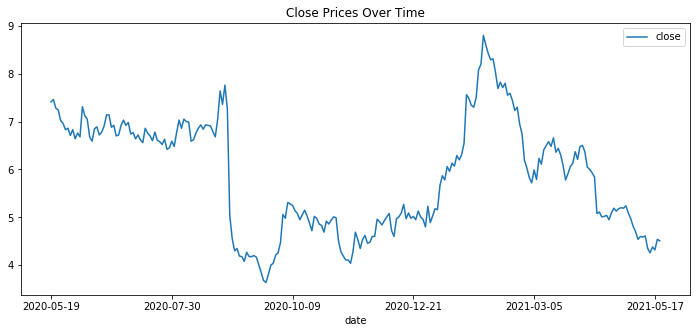

In [99]:
# Processing data

# Convert to JSON
data_json = json.loads(data)

# Show data in JSON format
#print(data_json)

# Describe data_json
print("Data type: ", type(data_json)) # Determine data type
print("Length: ", len(data_json))
print("Dictionay keys: ", data_json.keys())
print("Data type for prices: ", type(data_json['prices']))
print("Length of prices data: ", len(data_json['prices']))
print("First element of prices data: ", data_json['prices'][0])
print("Data type for elements of prices data: ", type(data_json['prices'][0]))
print("Dictionary keys for elements of prices data: ", data_json['prices'][0].keys())

# Convert to dataframe
df = pd.DataFrame(data_json['prices'])

# Explore dataframe
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("First 5 rows of df: \n", df.head(n = 5))

# Convert epoch date to datetime
df["date"] = df["date"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

# Sort dataframe starting from earliest date to most recent date
df = df.sort_values(by = ["date"], ascending = True)
df = df.reset_index(drop = True)

# Show dataframe
print("First 5 rows of df after processing date: \n", df.head(n = 5))

# Plot dataframe
df.plot(title = "Close Prices Over Time", x = "date", y = "close", figsize = (12,5));


##### PART 2: INTERMEDIATE
###### Pre-requisites: 
###### 1. Anaconda installed on desktop
###### 2. Some programming experience needed
###### 3. Create an account on https://rapidapi.com/

In [107]:
# Import packages
import pandas as pd # For data wrangling
import requests # For making API calls
import datetime # For date-related functions
import json # For converting data into JSON format
import plotly.express as px # For interactive data visualisation
# Import Python script (.py file)
import rapidapi_stock_historical_data_secret as secret # For usage of key

In [108]:
# Create function to make API call
def scrape(symbol = "AMRN", key = secret.key):
    
    # INPUTS
    # symbol (ticker symbol), string type
    # key (secret key provided by RapidAPI), string type
    
    # OUTPUTS
    # data, string type
    
    # Define URL
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v3/get-historical-data"
    
    # Define query and its parameters (symbol, region)
    query = {"symbol":symbol ,"region":"US"}
    
    # Define headers (a dictionary) and its key-value pairs
    headers = {
        'x-rapidapi-key': key,
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
        }
    
    # Show progress
    print(f"Making API call to URL {url}...")

    # Make API call to access stock data
    response = requests.request("GET", url, headers= headers, params= query)

    # Store scraped stock data
    data = response.text
    
    # Show progress
    print("Data scraped successfully.")

    # Output
    return data

In [109]:
def process(data):
    
    # INPUTS
    # data, string type
    
    # OUTPUTS
    # df, dataframe
    
    # Processing data

    # Convert to JSON
    data_json = json.loads(data)

    # Convert to dataframe
    df = pd.DataFrame(data_json['prices'])

    # Convert epoch date to datetime
    df["date"] = df["date"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

    # Sort dataframe starting from earliest date to most recent date
    df = df.sort_values(by = ["date"], ascending = True)
    df = df.reset_index(drop = True)
    
    # Show progress
    print(f"Data processed successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
    
    # Output
    return df

In [114]:
def interactive_plot(df, title, column_name = "close"):
    
    # INPUTS
    # df, dataframe
    # title (chart's title), string type
    # column_name (name of column from df to plot along y-axis), string type
    
    # OUTPUTS
    # chart, fig
    
    # Show progress
    print("Creating plot...")
    
    # Create figure
    fig = px.line(df, x = "date", y = column_name, title = title, width = 800, height = 400)
    
    # Output
    fig.show()
    

In [111]:
def export(df, filename, symbol = "AMRN"):
    
    # INPUTS
    # df, dataframe
    # filename (name of file to store df), string type
    
    # OUTPUTS
    
    # Define final filename
    final_filename = filename + "_" + symbol + "_" + datetime.datetime.today().strftime('%Y%m%d') + ".csv"
    
    # Export df
    df.to_csv(final_filename, index = False)
    
    # Show progress
    print(f"Dataframe exported successfully under filename {final_filename}.")

In [112]:
def main():
    
    # INPUTS
    # OUTPUTS
    # df, dataframe
    
    # Run entire pipeline
    data = scrape()
    df = process(data = data)
    interactive_plot(df = df, title = "Close Prices Over Time")
    export(df, filename = "webscraping_yahoo_stock_api")
    
    # Output
    return df

In [116]:
# Run code
df = main()

Making API call to URL https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v3/get-historical-data...
Data scraped successfully.
Data processed successfully with 252 rows and 7 columns.
Creating plot...


Dataframe exported successfully under filename webscraping_yahoo_stock_api_AMRN_20210522.csv.


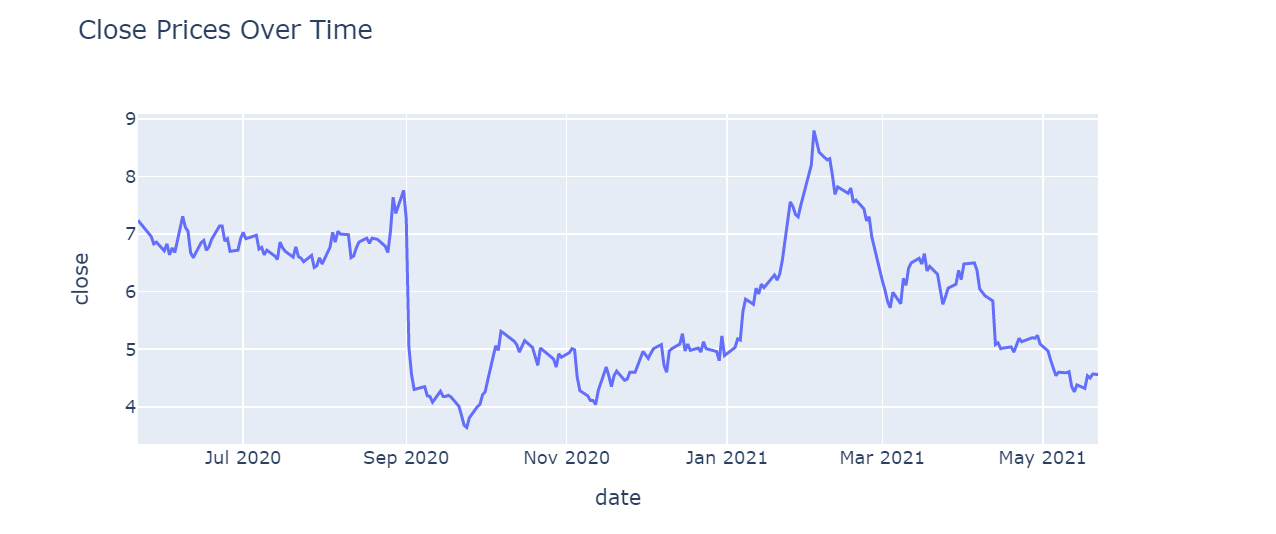